In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('/home/machine/Downloads/forestfires.csv')

In [3]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [4]:
df=df.drop(columns=['rain','area'])

In [5]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8
...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0


In [6]:
encoder=LabelEncoder()
df['month']=encoder.fit_transform(df['month'])
print("month:" ,df['month'])
df['day']=encoder.fit_transform(df['day'])
print("day:" ,df['day'])

month: 0       7
1      10
2      10
3       7
4       7
       ..
512     1
513     1
514     1
515     1
516     9
Name: month, Length: 517, dtype: int64
day: 0      0
1      5
2      2
3      0
4      3
      ..
512    3
513    3
514    3
515    2
516    5
Name: day, Length: 517, dtype: int64


In [7]:
X=df.iloc[:,0:10].values
y=df.iloc[:,10].values

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [9]:
clf=DecisionTreeRegressor(max_depth=3)

In [10]:
model=clf.fit(X_train,y_train)

[Text(334.8, 380.52, 'X[8] <= 8.25\nmse = 3.091\nsamples = 413\nvalue = 4.054'),
 Text(167.4, 271.8, 'X[9] <= 58.0\nmse = 5.744\nsamples = 19\nvalue = 6.074'),
 Text(83.7, 163.07999999999998, 'X[4] <= 82.95\nmse = 1.429\nsamples = 9\nvalue = 7.944'),
 Text(41.85, 54.360000000000014, 'mse = 0.0\nsamples = 2\nvalue = 5.8'),
 Text(125.55000000000001, 54.360000000000014, 'mse = 0.148\nsamples = 7\nvalue = 8.557'),
 Text(251.10000000000002, 163.07999999999998, 'X[6] <= 15.75\nmse = 3.643\nsamples = 10\nvalue = 4.39'),
 Text(209.25, 54.360000000000014, 'mse = 1.21\nsamples = 2\nvalue = 2.0'),
 Text(292.95, 54.360000000000014, 'mse = 2.466\nsamples = 8\nvalue = 4.988'),
 Text(502.20000000000005, 271.8, 'X[7] <= 10.5\nmse = 2.756\nsamples = 394\nvalue = 3.957'),
 Text(418.5, 163.07999999999998, 'X[8] <= 18.95\nmse = 2.514\nsamples = 279\nvalue = 3.671'),
 Text(376.65000000000003, 54.360000000000014, 'mse = 2.851\nsamples = 156\nvalue = 3.997'),
 Text(460.35, 54.360000000000014, 'mse = 1.782\ns

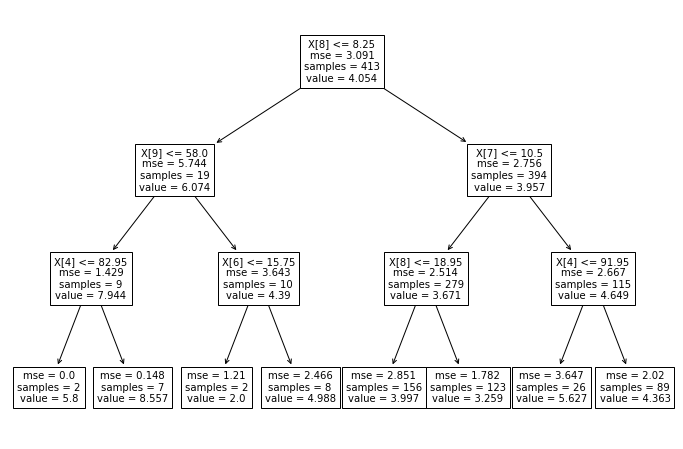

In [11]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(model)

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
cv_results = cross_validate(model,X,y,cv=3)

In [13]:
sorted(cv_results.keys())

['fit_time', 'score_time', 'test_score']

In [14]:
cv_results['test_score']

array([-0.14664174,  0.03665089, -0.1344322 ])

In [15]:
scores=cross_validate(model,X,y,cv=3,scoring=('r2','neg_mean_squared_error'),return_train_score=True)

In [16]:
print(scores['test_neg_mean_squared_error'])

[-3.4791016  -3.40822261 -3.40948105]
